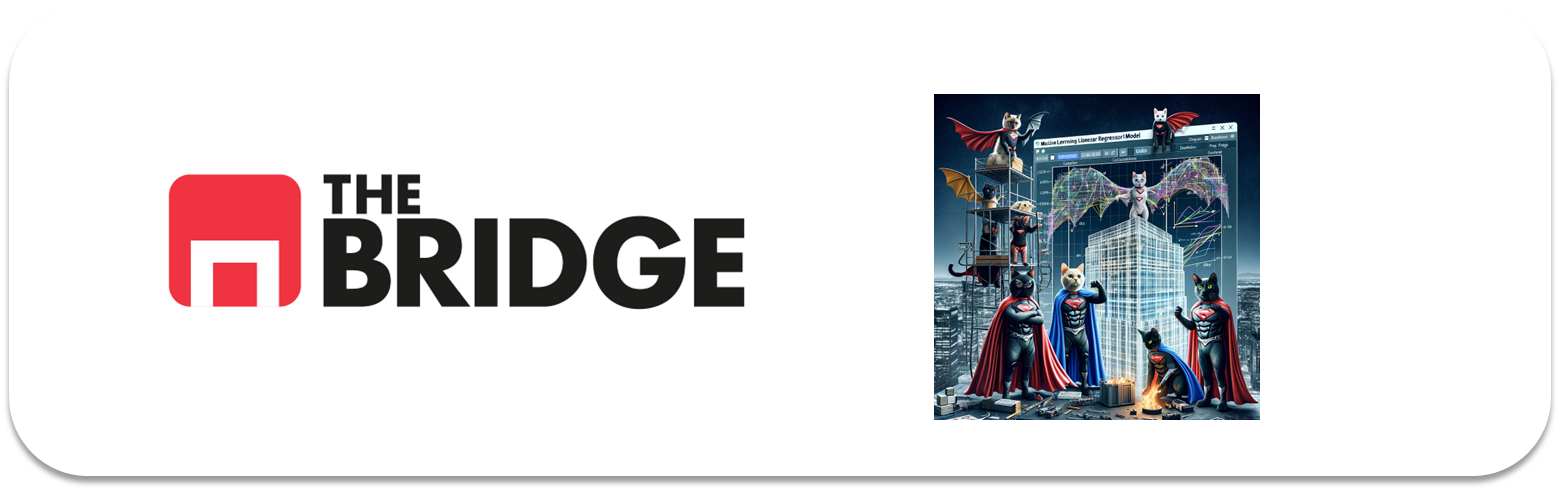

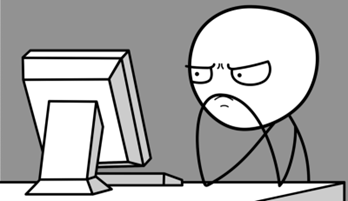

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

En este conjunto de ejercicios crearás un modelo para resolver un problema multiclase o multicategórico de clasificación, en concreto de clasificación de flores en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [2]:
from sklearn.datasets import load_iris

# cargo datos
iris = load_iris() 

# visualizo info
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
# DF de las features
df_iris = pd.DataFrame(iris.data , columns=iris.feature_names)
df_iris 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df_iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [6]:
# añado la columna class, que es mi target al df_iris
df_iris['class'] = iris.target
df_iris['class'].value_counts()

class
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
df_iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [8]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
# los valores names de la variable target
target_classes = iris.target_names
target_classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: xlabel='class', ylabel='count'>

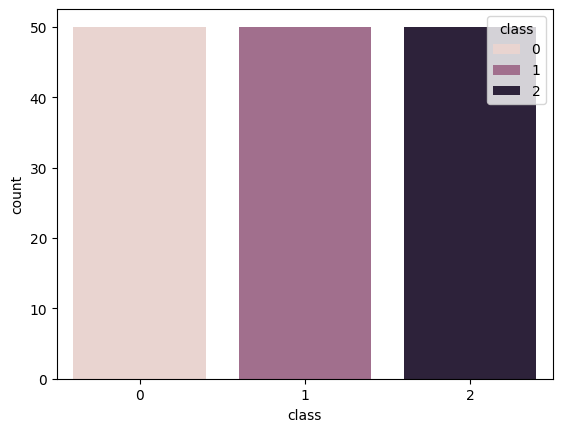

In [10]:
# Plot the countplot
sns.countplot(x='class', data = df_iris, hue='class')

### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?


In [11]:
X = df_iris.drop(columns=['class']) # Features de df_iris
y = df_iris['class']                # Target df_iris

In [12]:
# SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [13]:
print(df_iris.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(150, 5)
(120, 4)
(30, 4)
(120,)
(30,)


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

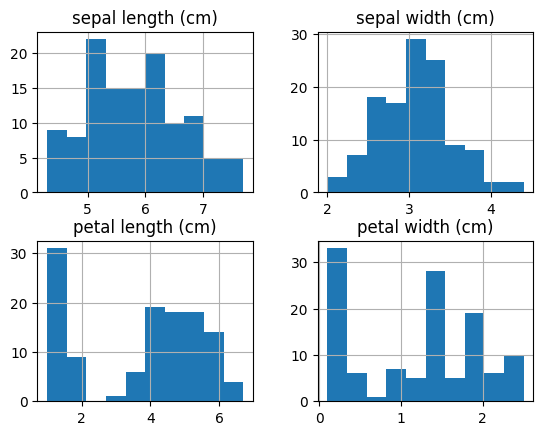

In [14]:
X_train.hist()

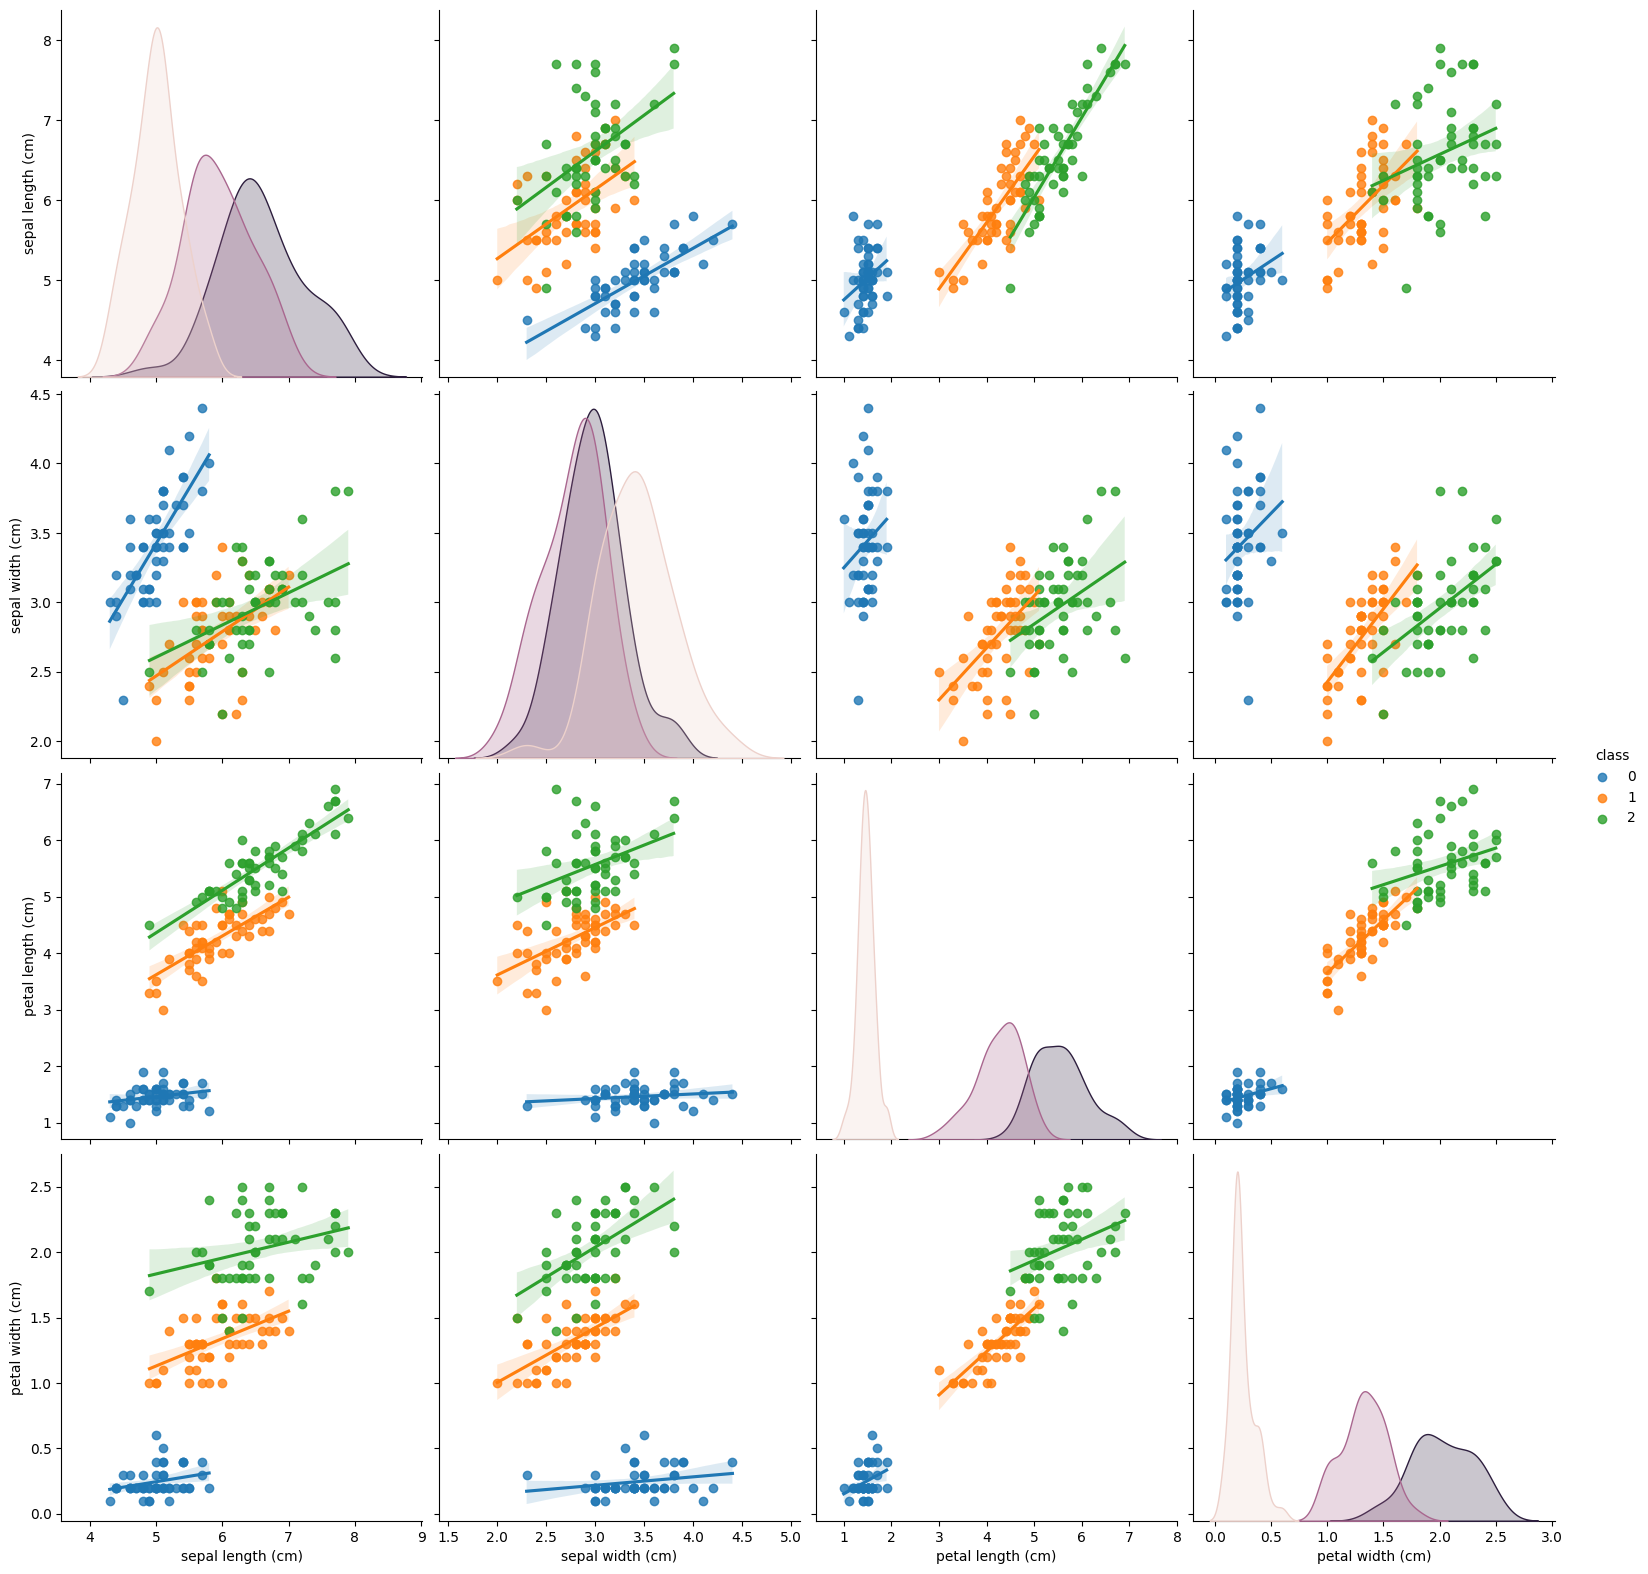

In [15]:
sns.pairplot(df_iris,
            hue='class',
            height = 4,
            vars = X_train.columns,
            kind='reg',
            corner = False)

In [16]:
# normalizamos

from sklearn.preprocessing import StandardScaler

# primero FIT -> TRAIN
scaler = StandardScaler()
scaler.fit(X_train)

# segundo TRANSFORM  -> TRAIN & TEST
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

X_train.describe()

,0,1,2,3
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,1.754152e-15,-1.694940e-15,-2.294461e-16,-2.960595e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.839628e+00,-2.373778e+00,-1.562535e+00,-1.446088e+00
25%,-8.644522e-01,-5.850598e-01,-1.276006e+00,-1.179118e+00
50%,-7.212234e-02,-1.378803e-01,2.998997e-01,1.557325e-01
75%,7.202076e-01,7.564785e-01,7.869979e-01,8.231577e-01
max,2.304867e+00,2.992376e+00,1.703889e+00,1.757553e+00


### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [18]:
#Predicciones
predicciones_train = log_reg.predict(X_train)

In [19]:
#Probabilidades
log_reg.predict_proba(X_train)

array([[9.95652242e-01, 4.34774105e-03, 1.69181303e-08],
       [9.94801001e-01, 5.19896698e-03, 3.15696565e-08],
       [9.71625811e-03, 8.79386451e-01, 1.10897291e-01],
       [9.80471287e-01, 1.95284837e-02, 2.28934632e-07],
       [9.86305375e-01, 1.36944859e-02, 1.39000188e-07],
       [1.70008916e-04, 1.57187124e-01, 8.42642867e-01],
       [1.76207391e-02, 8.20035061e-01, 1.62344200e-01],
       [9.72699282e-01, 2.73004805e-02, 2.37587538e-07],
       [9.87258087e-01, 1.27418276e-02, 8.55601182e-08],
       [9.96384055e-01, 3.61593504e-03, 9.53298159e-09],
       [8.06563588e-04, 1.68482125e-01, 8.30711311e-01],
       [5.73998862e-02, 7.61227296e-01, 1.81372818e-01],
       [5.78974034e-03, 7.68279623e-01, 2.25930636e-01],
       [9.87703343e-01, 1.22965476e-02, 1.09223550e-07],
       [9.78927372e-01, 2.10724884e-02, 1.39776226e-07],
       [3.18402550e-02, 9.46142487e-01, 2.20172577e-02],
       [2.43010768e-03, 5.58058451e-01, 4.39511441e-01],
       [1.05896071e-03, 2.32541

In [20]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, log_reg.predict(X_train))
print(acc_train)

0.9666666666666667


In [21]:
from sklearn.metrics import confusion_matrix

# matriz de confusion multiclase
cm_train = pd.DataFrame(confusion_matrix  (y_train, predicciones_train), 
                                    index=[f"Real {i}" for i in target_classes], 
                                    columns=[f"Predicho {i}" for i in target_classes])

cm_train

,Predicho setosa,Predicho versicolor,Predicho virginica
Real setosa,40,0,0
Real versicolor,0,38,3
Real virginica,0,1,38


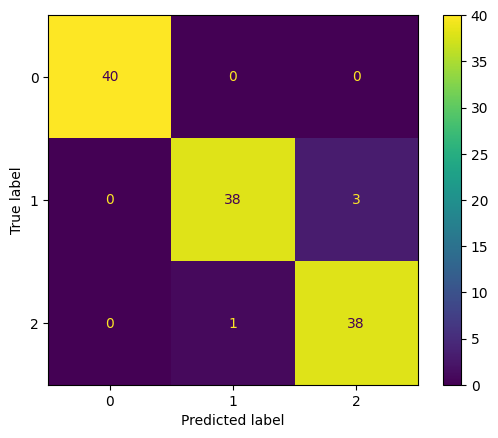

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train,predicciones_train);

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_train, predicciones_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [24]:
#Predicciones
predicciones_test = log_reg.predict(X_test)

In [25]:
# matriz de confusion multiclase
cm_test = pd.DataFrame(confusion_matrix  (y_test, predicciones_test), 
                                    index=[f"Real {i}" for i in log_reg.classes_], 
                                    columns=[f"Predicho {i}" for i in log_reg.classes_])
cm_test

,Predicho 0,Predicho 1,Predicho 2
Real 0,10,0,0
Real 1,0,9,0
Real 2,0,0,11


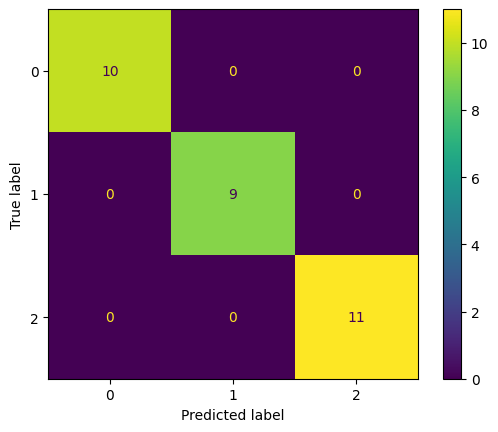

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_test);

In [27]:
print(classification_report(y_test, predicciones_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [28]:
log_reg.coef_


array([[-1.00316587,  1.14487318, -1.8113482 , -1.69251025],
       [ 0.52799044, -0.28319987, -0.34060665, -0.72013959],
       [ 0.47517543, -0.86167331,  2.15195485,  2.41264984]])

In [53]:
df_coefs = pd.DataFrame(log_reg.coef_,
                        index = target_classes, 
                        columns = X.columns)
df_coefs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-1.003166,1.144873,-1.811348,-1.69251
versicolor,0.527990,-0.283200,-0.340607,-0.72014
virginica,0.475175,-0.861673,2.151955,2.41265


In [63]:
df_coefs = pd.DataFrame(log_reg.coef_, columns=X.columns)


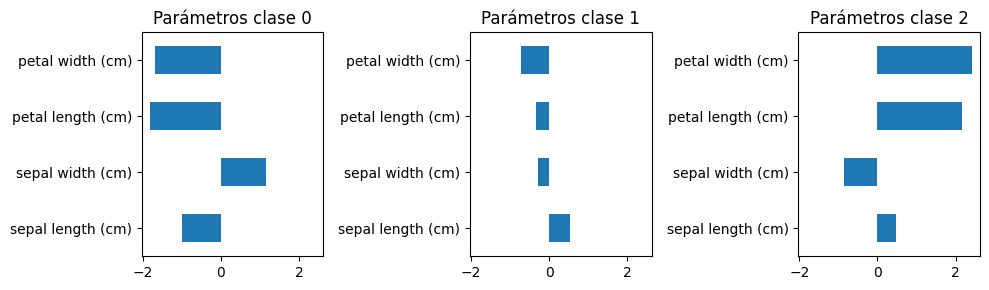

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3), sharex=True)
for i, subdf in df_coefs.iterrows():
    subdf.plot(kind="barh", ax=ax[i])
    ax[i].set_title(f"Parámetros clase {i}")

fig.tight_layout()

### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

,coefs
sepal length (cm),-1.003166
sepal width (cm),1.144873
petal length (cm),-1.811348
petal width (cm),-1.692510


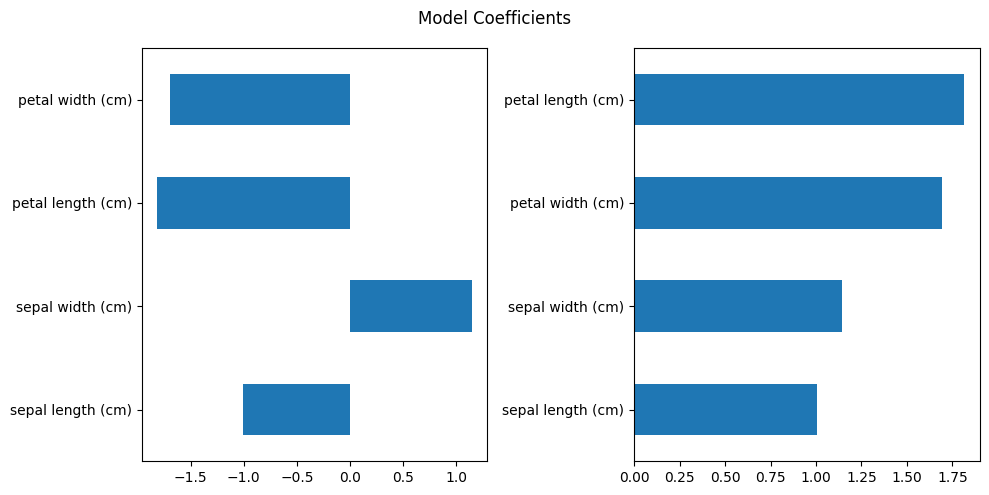

In [68]:

def show_coefs(model, figsize=(10, 5)):
    
    df_coef = pd.DataFrame(model.coef_[0], 
                           index = X.columns, 
                           columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    df_coef.plot(kind="barh", 
                 ax=ax[0], 
                 legend=False)
    
    # en absoluto
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", 
                                               ax=ax[1], 
                                               legend=False)
    
    
    fig.suptitle("Model Coefficients")
    fig.tight_layout()

    return df_coef

show_coefs(log_reg, figsize=(10, 5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.003166,1.144873,-1.811348,-1.69251
1,0.527990,-0.283200,-0.340607,-0.72014
2,0.475175,-0.861673,2.151955,2.41265


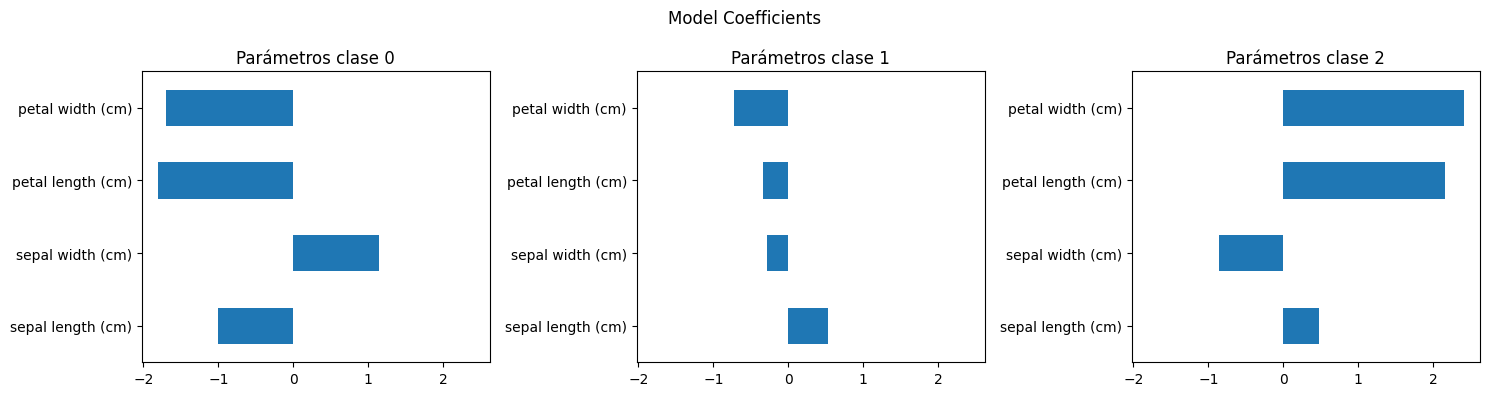

In [ ]:
def show_coefs(model, figsize=(15, 4)):
    df_coef = pd.DataFrame(model.coef_, 
                           columns=X.columns)

    fig, ax = plt.subplots(1, 3, figsize=figsize,sharex=True)
    for i, subdf in df_coef.iterrows():
        subdf.plot(kind="barh", ax=ax[i])
        ax[i].set_title(f"Parámetros clase {i}")
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

show_coefs(log_reg)